# PID control algorithm test #1
system configuration:
- tube length: 9 inch
- 3/4 inch sleeve diameter
- pressure of air: 60psi
- proportional gain: 1.2
- integral gain: 0.35
- derivative gain: 0.3
- tolerance: +- 5deg
- calculation of PID not stopped when in tolerance

After test:
Algorithm got to correct angle however as it got to the target and into tolerance it started to drift away fast. In next test, algorithm calculation should be disabled and reseted until it gets from tolerance. Also longer muscle should be used so whole operating radius can be utilized (0deg to 90 deg).

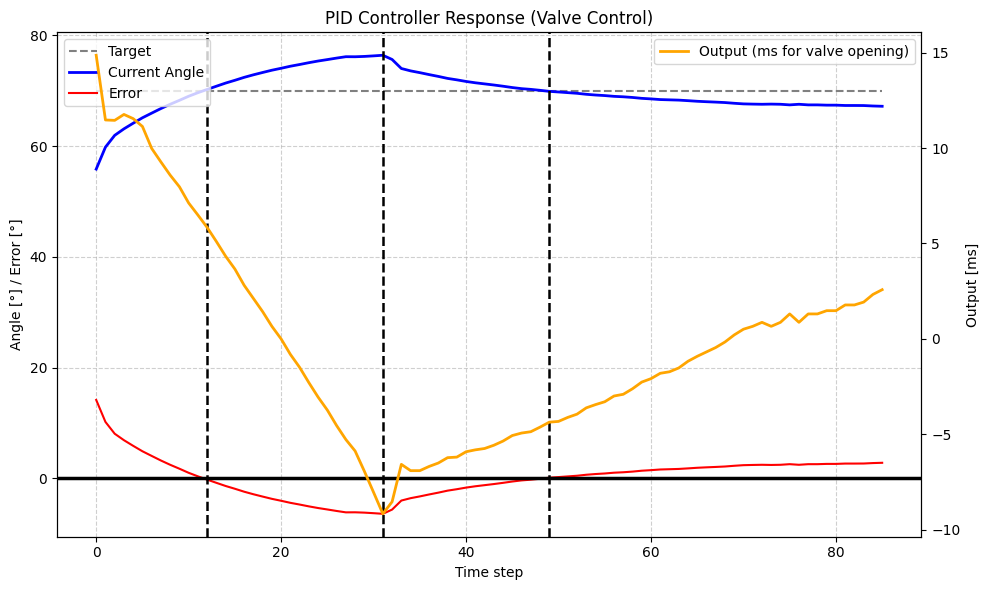

In [8]:
import matplotlib.pyplot as plt

with open("pid-tests/transformed-data/pid-test-1.txt", "r") as f:
    lines = [line.strip() for line in f if line.strip() and not line.startswith("#")]

# Parse values from dataset
targets, angles, errors, outputs = [], [], [], []
for line in lines:
    parts = line.split(";")
    if len(parts) == 4:
        t, a, e, o = map(float, parts)
        targets.append(t)
        angles.append(a)
        errors.append(e)
        outputs.append(o)

time = list(range(len(targets)))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y axis (Target, Angle, Error)
ax1.plot(time, targets, '--', label='Target', color='gray', linewidth=1.5)
ax1.plot(time, angles, label='Current Angle', color='blue', linewidth=2)
ax1.plot(time, errors, label='Error', color='red', linewidth=1.5)
ax1.set_xlabel('Time step')
ax1.set_ylabel('Angle [°] / Error [°]')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)

# 👉 Tučná čára v nule
ax1.axhline(0, color='black', linewidth=2.5, linestyle='-')  # <— přidaný řádek

# Funkce pro nalezení crossing point
def find_crossings(angle_list, target_list):
    up_cross = None
    down_cross = None
    for i in range(1, len(angle_list)):
        # Crossing zdola nahoru
        if angle_list[i-1] < target_list[i-1] and angle_list[i] >= target_list[i]:
            up_cross = i
        # Crossing shora dolů
        if angle_list[i-1] > target_list[i-1] and angle_list[i] <= target_list[i]:
            down_cross = i
    return up_cross, down_cross

up_cross, down_cross = find_crossings(angles, targets)

# Crossing points
if up_cross is not None:
    ax1.axvline(up_cross, color='black', linestyle='--', linewidth=1.8, label='Cross Up')
if down_cross is not None:
    ax1.axvline(down_cross, color='black', linestyle='--', linewidth=1.8, label='Cross Down')

# Vertikální čára pro maximum aktuálního úhlu
max_index = angles.index(max(angles))
ax1.axvline(max_index, color='black', linestyle='--', linewidth=1.8, label='Max Angle')

# Right Y axis (Output)
ax2 = ax1.twinx()
ax2.plot(time, outputs, label='Output (ms for valve opening)', color='orange', linewidth=2)
ax2.set_ylabel('Output [ms]')
ax2.legend(loc='upper right')

plt.title('PID Controller Response (Valve Control)')
plt.tight_layout()
plt.show()

# PID control algorithm test #2
system configuration:
- tube length: 9 1/2 inch
- 3/4 inch sleeve diameter
- pressure of air: 60psi
- proportional gain: 1,2
- integral gain: 0,35
- derivative gain: 0,5
- tolerance: +- 5deg

Before test:
new tweaks: Control muscle and calculations of PID are now stopped when in tolerance. Minimal open valve time dropped from 50ms to 20ms.

After test: